In [19]:
#Importing Necessary Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wr
import re

#Command to Ignore Irrelevant Warnings
wr.filterwarnings("ignore")

#                                                         Data Preparation

In [20]:
#importing the  Bitcoin dataset
bit = pd.read_csv('D:/Datasets/Bitcoin Historical Data.csv')
bit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507 entries, 0 to 1506
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1507 non-null   object
 1   Price     1507 non-null   object
 2   Open      1507 non-null   object
 3   High      1507 non-null   object
 4   Low       1507 non-null   object
 5   Vol.      1507 non-null   object
 6   Change %  1507 non-null   object
dtypes: object(7)
memory usage: 82.5+ KB


In [23]:
#importing the Etherium dataset
eth = pd.read_csv("D:\Datasets\Ethereum Historical Data.csv")
eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507 entries, 0 to 1506
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1507 non-null   object
 1   Price     1507 non-null   object
 2   Open      1507 non-null   object
 3   High      1507 non-null   object
 4   Low       1507 non-null   object
 5   Vol.      1507 non-null   object
 6   Change %  1507 non-null   object
dtypes: object(7)
memory usage: 82.5+ KB


# Data Preprocessing

In [25]:
#converting the object dtype to integer dtype for the ease in calculation
bit['Close']= bit['Price'].str.replace(',','').astype('float')
bit['Open']= bit['Open'].str.replace(',','').astype('float')
bit['High']= bit['High'].str.replace(',','').astype('float')
bit['Low']= bit['Low'].str.replace(',','').astype('float')

#a user-define function to convert volume which is in object dtype to the integer dtype
def convert_volume(volume_str):
    if isinstance(volume_str, (int, float)): # Check if it's already a number
        return volume_str
    match = re.match(r"([\d.]+)([KM]?)", volume_str)  # Extract number and unit
    if match:
        number = float(match.group(1))
        unit = match.group(2)
        if unit == 'K':
            return number * 1000
        elif unit == 'M':
            return number * 1000000
        else:  # No unit or other unit
            return number
    return None  # Or handle invalid input as needed

#applying the function
bit['Vol. in K'] = bit['Vol.'].astype('str').apply(convert_volume)

bit['Close Volatility %']= bit['Change %'].str.replace('%','').astype('float')
bit = bit.drop('Price',axis = 1)
bit = bit.drop('Change %', axis= 1)
bit = bit.drop('Vol.', axis= 1)
bit = pd.DataFrame(bit)
bit['Date']= pd.to_datetime(bit['Date'])
bit.set_index('Date', inplace=True)

In [29]:
#Adding two new columns: Daily Price Range and Itraday Volatility in % for the Analysis purpose
bit['Daily Price Range'] = bit['High'] - bit['Low']
bit['Itraday Volatility in %'] = (bit['High'] - bit['Low'])/bit['Open'] * 100

bit.head()

,Open,High,Low,Close,Vol. in K,Close Volatility %,Daily Price Range,Itraday Volatility in %
Date,,,,,,,,
2025-02-15,97504.4,97973.2,97210.8,97573.4,29650.0,0.07,762.4,0.781913
2025-02-14,96611.6,98817.3,96316.5,97504.6,65370.0,0.93,2500.8,2.588509
2025-02-13,97874.7,98079.6,95295.4,96610.2,66760.0,-1.30,2784.2,2.844658
2025-02-12,95777.2,98095.8,94110.7,97881.3,87210.0,2.20,3985.1,4.160802
2025-02-11,97434.7,98476.5,94902.7,95771.7,69890.0,-1.71,3573.8,3.667892


In [11]:
bit.tail()

,Open,High,Low,Close,Vol. in K,Close Volatility %,Daily Price Range,Itraday Volatility in %
Date,,,,,,,,
2021-01-05,32015.4,34414.7,30010.5,33991.5,202130.0,6.15,4404.2,13.756505
2021-01-04,33016.6,33587.5,28204.5,32022.6,255270.0,-2.84,5383.0,16.303920
2021-01-03,32192.9,34755.9,32029.6,32958.9,155210.0,2.38,2726.3,8.468637
2021-01-02,29359.7,33233.5,29008.0,32193.3,240870.0,9.65,4225.5,14.392177
2021-01-01,28951.7,29627.1,28712.4,29359.9,100900.0,1.42,914.7,3.159400


In [13]:
#checking for any null value
bit.isna().sum()

Open                       0
High                       0
Low                        0
Close                      0
Vol. in K                  0
Close Volatility %         0
Daily Price Range          0
Itraday Volatility in %    0
dtype: int64

**There are no missing values in the BTC dataset**

In [15]:
#checking for duplicate values
bit.duplicated().sum()

0

**There are no duplicate values in the BTC dataset**

In [27]:
#converting the columns into the desire dtype as above
eth['Close']= eth['Price'].str.replace(',','').astype('float')
eth['Open']= eth['Open'].str.replace(',','').astype('float')
eth['High']= eth['High'].str.replace(',','').astype('float')
eth['Low']= eth['Low'].str.replace(',','').astype('float')

#user-define function to convert volume to integer dtype based on some parameters
def convert_volume(volume_str):
    if isinstance(volume_str, (int, float)): # Check if it's already a number
        return volume_str
    match = re.match(r"([\d.]+)([KM]?)", volume_str)  # Extract number and unit
    if match:
        number = float(match.group(1))
        unit = match.group(2)
        if unit == 'K':
            return number * 1000
        elif unit == 'M':
            return number * 1000000
        else:  # No unit or other unit
            return number
    return None  # Or handle invalid input as needed

eth['Vol. in K'] = eth['Vol.'].astype('str').apply(convert_volume)

eth['Close Volatility %']= eth['Change %'].str.replace('%','').astype('float')
eth = eth.drop('Price',axis = 1)
eth = eth.drop('Change %', axis= 1)
eth = eth.drop('Vol.', axis= 1)
eth = pd.DataFrame(eth)
eth['Date']= pd.to_datetime(eth['Date'])
eth.set_index('Date', inplace=True)
eth.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1507 entries, 2025-02-15 to 2021-01-01
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open                1507 non-null   float64
 1   High                1507 non-null   float64
 2   Low                 1507 non-null   float64
 3   Close               1507 non-null   float64
 4   Vol. in K           1507 non-null   float64
 5   Close Volatility %  1507 non-null   float64
dtypes: float64(6)
memory usage: 82.4 KB


In [31]:
#Adding two new columns: Daily Price Range and Itraday Volatility in % for the Analysis purpose
eth['Daily Price Range'] = eth['High'] - eth['Low']
eth['Itraday Volatility in %'] = (eth['High'] - eth['Low'])/eth['Open'] * 100

eth.head()

,Open,High,Low,Close,Vol. in K,Close Volatility %,Daily Price Range,Itraday Volatility in %
Date,,,,,,,,
2025-02-15,2725.51,2738.17,2675.51,2693.40,216630.0,-1.18,62.66,2.299019
2025-02-14,2675.33,2789.23,2665.51,2725.51,466760.0,1.88,123.72,4.624476
2025-02-13,2737.86,2756.21,2617.39,2675.30,496620.0,-2.22,138.82,5.070383
2025-02-12,2603.11,2789.88,2553.50,2735.91,689450.0,5.10,236.38,9.080677
2025-02-11,2661.00,2724.50,2579.93,2603.11,521350.0,-2.18,144.57,5.432920


In [34]:
#counting the null values in the dataset
eth.isna().sum()

Open                       0
High                       0
Low                        0
Close                      0
Vol. in K                  0
Close Volatility %         0
Daily Price Range          0
Itraday Volatility in %    0
dtype: int64

**There are no missing values in the Etherium dataset**

In [36]:
#counting the duplicate values in the dataset
eth.duplicated().sum()

0

**There are no duplicate values in the Etherium dataset**

# Explanatory Data Analysis

## A. Seasonal and Trend decomposition using Loess Model

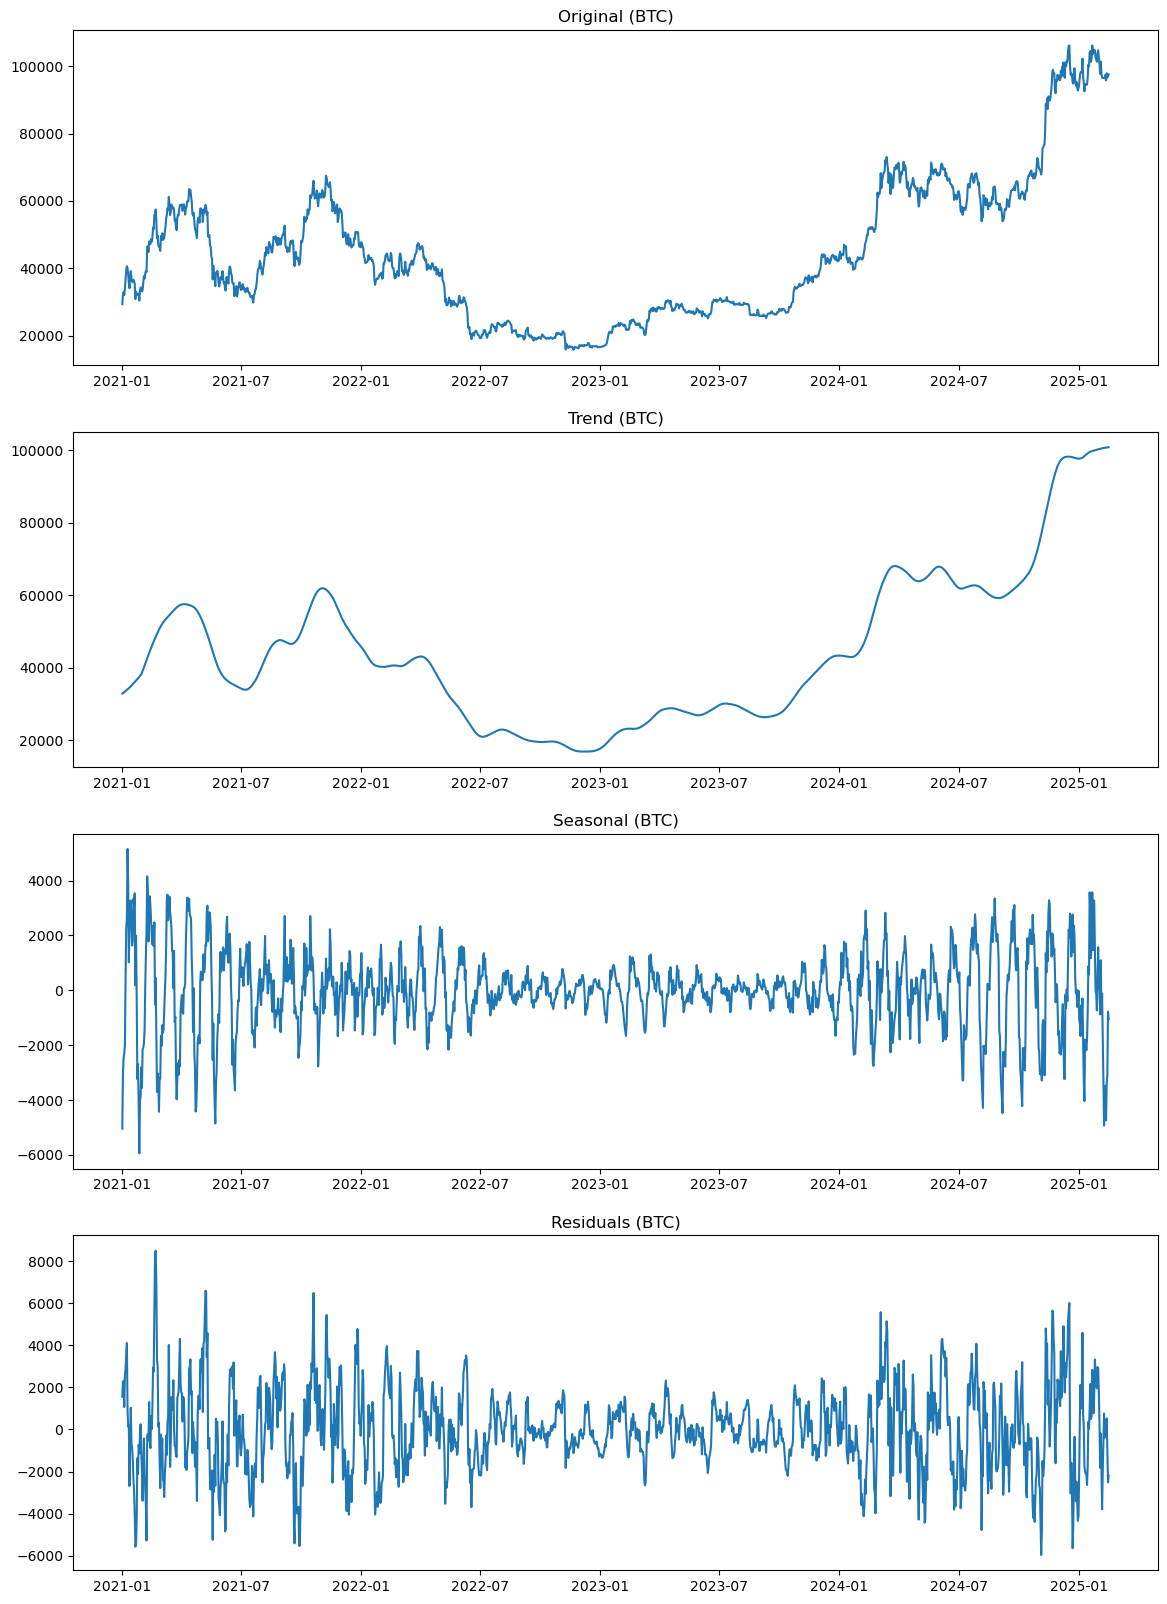

In [62]:
#importing Seasonal and Trend decomposition using Loess Model from the StasModel Library
from statsmodels.tsa.seasonal import STL
stl = STL(bit['Close'], period = 30)
result = stl.fit()#fitting the model

#plotting the original price data
plt.figure(figsize= (14,20))
plt.subplot(4,1,1)
plt.plot(result.observed,)
plt.title('Original (BTC)')

#plotting the trend data obtain using STL model
plt.subplot(4,1,2)
plt.plot(result.trend)
plt.title('Trend (BTC)')

#plotting the seasonal data obtain using STL model
plt.subplot(4,1,3)
plt.plot(result.seasonal)
plt.title('Seasonal (BTC)')

#plotting the residuals data obtain using STL model
plt.subplot(4,1,4)
plt.plot(result.resid)
plt.title('Residuals (BTC)');

**Original Data - Data exhibits strong volatility and cyclical trends, particularly with significant peaks and declines over time.**

**Trend - From 2021 to 2023-07, there was a downward trend, i.e, decrease in the closing price but after it there is an upward trend meaning an    increase in price.**

**Seasonality - There is seasonality in data. There are periodic price flunctuation, but these vary in magnitudes over time.**

**Residuals - There is high residual volatility in the closing price of BTC.**

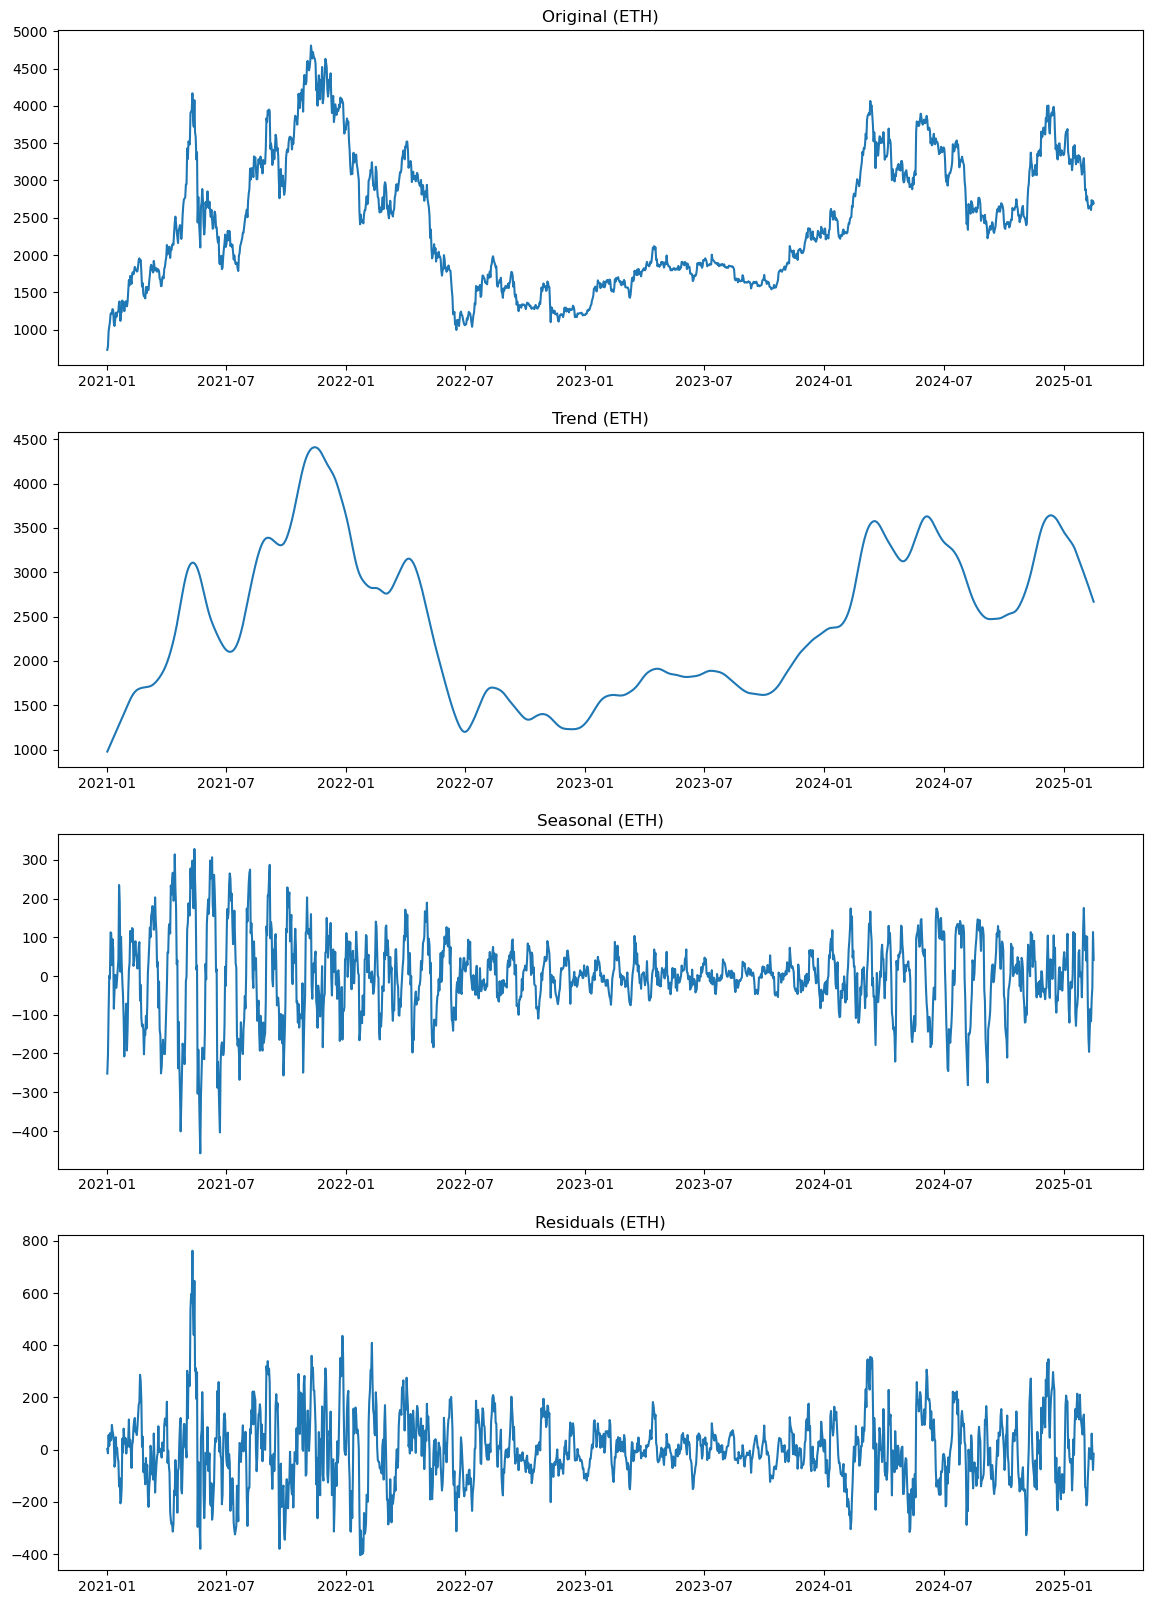

In [64]:
#importing Seasonal and Trend decomposition using Loess Model from the StasModel Library
from statsmodels.tsa.seasonal import STL
stl = STL(eth['Close'], period = 30)
result = stl.fit()#fitting the model

#plotting the original price data
plt.figure(figsize= (14,20))
plt.subplot(4,1,1)
plt.plot(result.observed,)
plt.title('Original (ETH)')

#plotting the trend data obtain using STL model
plt.subplot(4,1,2)
plt.plot(result.trend)
plt.title('Trend (ETH)')

#plotting the seasonal data obtain using STL model
plt.subplot(4,1,3)
plt.plot(result.seasonal)
plt.title('Seasonal (ETH)')

#plotting the residual data obtain using STL model
plt.subplot(4,1,4)
plt.plot(result.resid)
plt.title('Residuals (ETH)');

**Original Data - Data exhibits strong volatility and cyclical trends, particularly with significant peaks and declines over time.**

**Trend - From 2021 to 2023-07, there was a downward trend, i.e, decrease in the closing price but after it there is an upward trend meaning an    increase in price but in a slow pace as compare to BTC.**

**Seasonality - There is seasonality in data. There are periodic price flunctuation, but these vary in magnitudes over time.**

**Residuals - There is high residual volatility in the closing price of BTC.**

In [33]:
#renaming the columns to make a combine dataset
bit.columns = ['BTC_Open','BTC_High','BTC_Low','BTC_Close','BTC_Vol. in K','BTC_Close Volatility %','BTC_Daily Price Range','BTC_Itraday Volatility in %']
eth.columns = ['ETH_Open','ETH_High','ETH_Low','ETH_Close','ETH_Vol. in K','ETH_Close Volatility %','ETH_Daily Price Range','ETH_Itraday Volatility in %']

#concatenating or merging the two datasets by using Date as index
cry = pd.concat([bit,eth], axis = 1)

#to check whether the dataset is ready or not
cry.head()

,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_Vol. in K,BTC_Close Volatility %,BTC_Daily Price Range,BTC_Itraday Volatility in %,ETH_Open,ETH_High,ETH_Low,ETH_Close,ETH_Vol. in K,ETH_Close Volatility %,ETH_Daily Price Range,ETH_Itraday Volatility in %
Date,,,,,,,,,,,,,,,,
2025-02-15,97504.4,97973.2,97210.8,97573.4,29650.0,0.07,762.4,0.781913,2725.51,2738.17,2675.51,2693.40,216630.0,-1.18,62.66,2.299019
2025-02-14,96611.6,98817.3,96316.5,97504.6,65370.0,0.93,2500.8,2.588509,2675.33,2789.23,2665.51,2725.51,466760.0,1.88,123.72,4.624476
2025-02-13,97874.7,98079.6,95295.4,96610.2,66760.0,-1.30,2784.2,2.844658,2737.86,2756.21,2617.39,2675.30,496620.0,-2.22,138.82,5.070383
2025-02-12,95777.2,98095.8,94110.7,97881.3,87210.0,2.20,3985.1,4.160802,2603.11,2789.88,2553.50,2735.91,689450.0,5.10,236.38,9.080677
2025-02-11,97434.7,98476.5,94902.7,95771.7,69890.0,-1.71,3573.8,3.667892,2661.00,2724.50,2579.93,2603.11,521350.0,-2.18,144.57,5.432920


## B. Price/Volume Trends:

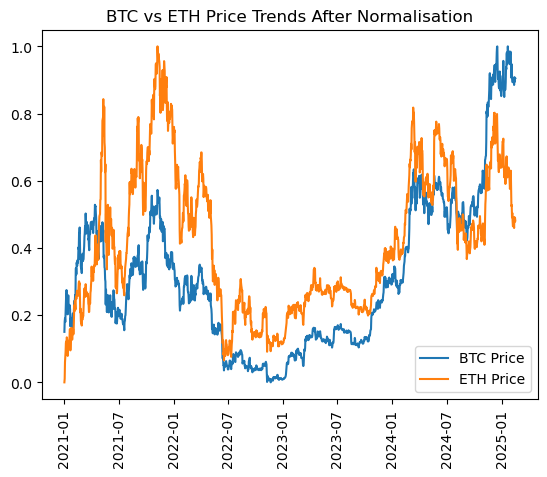

In [47]:
#Normalising the Price of Bitcoin and Etherium as there is a vast difference between there prices 
btc_nor = (cry['BTC_Close'] - np.min(cry['BTC_Close']))/( np.max(cry['BTC_Close']) - np.min(cry['BTC_Close']))
eth_nor = (cry['ETH_Close'] - np.min(cry['ETH_Close']))/(np.max(cry['ETH_Close']) - np.min(cry['ETH_Close'])) 

#visualising there normalised prices
plt.plot(btc_nor, label='BTC Price')
plt.plot(eth_nor, label='ETH Price')
plt.title('BTC vs ETH Price Trends After Normalisation')#adding title to the graph
plt.xticks(rotation = 'vertical')#rotation the labels of x-axis
plt.legend();#adding legends

**Price of both BTC and Etherium have increased with time but Etherium have faced a heavy reduction in its price after reaching its highest closing since date at the end of 2021 unlike BTC. The price of BTC is increasing at a higher pace than Ethereum.**

## C. BTC vs ETH Returns:

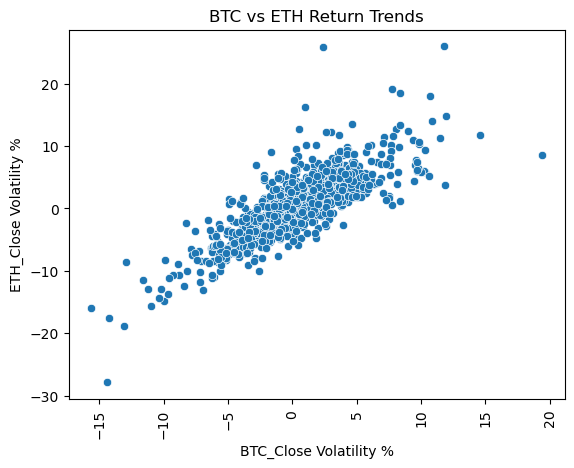

In [82]:
#visualising the Bitcoin and Eterium Close Volatility or Return
sns.scatterplot(x='BTC_Close Volatility %', y='ETH_Close Volatility %', data=cry)
plt.title('Daily Returns: BTC vs ETH')
plt.title('BTC vs ETH Return Trends')
plt.xticks(rotation = 'vertical');

**This plot shows that there is high dependency between BTC and Etherium Return over the time. They are positively correlated and have a strong linear relationship.**

## D. Rolling Correlation (30-day):

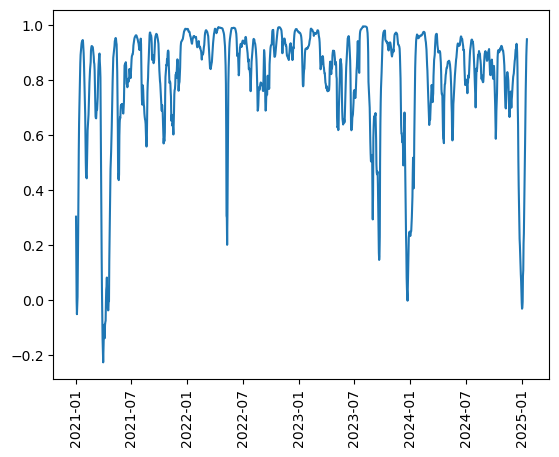

In [55]:
#Calculating the Rolling Correlation of Bitcoin And Eterium for a rolling period of 30 days
roll_cor = cry['BTC_Close'].rolling(30).corr(cry['ETH_Close'])

#Plotting the cordinates of Rolling Correlation
plt.plot(roll_cor)
plt.xticks(rotation = 'vertical');

**Most of the values are above 0.6 suggesting that there is a high correlation between the BTC and Etherium closing price. At some instance the value had dropped below 0 suggest at that point correlation became neagative.** 

# Statistical Analysis

## A. Pearson Correlation

In [59]:
#Creating A Correlation Matrix for Closing Price And Return of BTC and Etherium
corr_matrix = cry[['BTC_Close','ETH_Close','BTC_Close Volatility %','ETH_Close Volatility %']].corr()
corr_matrix

,BTC_Close,ETH_Close,BTC_Close Volatility %,ETH_Close Volatility %
BTC_Close,1.000000,0.737759,0.046107,0.027495
ETH_Close,0.737759,1.000000,0.016997,0.032126
BTC_Close Volatility %,0.046107,0.016997,1.000000,0.808230
ETH_Close Volatility %,0.027495,0.032126,0.808230,1.000000


**There a high Correlation between BTC and Etherium Closing price. There correlation coefficient is 0.737759 which is close to 1.0 suggest that there is strong relationship between there closing price. Similarly for Close Volatility % , correlation coefficient is 0.8 means a strong positive relationship.**

## B. Granger Causality Test:

In [61]:
#Import Granger Causality Tests from the Statsmodel library to check the dependency of Etherium Return on BTC Return
from statsmodels.tsa.stattools import grangercausalitytests
granger_test = grangercausalitytests(cry[['BTC_Close Volatility %', 'ETH_Close Volatility %']], maxlag=3)
granger_test


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0405  , p=0.8406  , df_denom=1503, df_num=1
ssr based chi2 test:   chi2=0.0406  , p=0.8404  , df=1
likelihood ratio test: chi2=0.0406  , p=0.8404  , df=1
parameter F test:         F=0.0405  , p=0.8406  , df_denom=1503, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0472  , p=0.9539  , df_denom=1500, df_num=2
ssr based chi2 test:   chi2=0.0947  , p=0.9538  , df=2
likelihood ratio test: chi2=0.0947  , p=0.9538  , df=2
parameter F test:         F=0.0472  , p=0.9539  , df_denom=1500, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3801  , p=0.7674  , df_denom=1497, df_num=3
ssr based chi2 test:   chi2=1.1456  , p=0.7661  , df=3
likelihood ratio test: chi2=1.1451  , p=0.7662  , df=3
parameter F test:         F=0.3801  , p=0.7674  , df_denom=1497, df_num=3


{1: ({'ssr_ftest': (0.040471918276820715, 0.840587915054042, 1503.0, 1),
   'ssr_chi2test': (0.04055270054883033, 0.840403789582466, 1),
   'lrtest': (0.04055215456901351, 0.8404048495007354, 1),
   'params_ftest': (0.04047191827660756, 0.8405879150543663, 1503.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.04718807679629625, 0.9539093887581642, 1500.0, 2),
   'ssr_chi2test': (0.09469074077123446, 0.9537579409535105, 2),
   'lrtest': (0.09468776204721507, 0.953759361445412, 2),
   'params_ftest': (0.04718807679637027, 0.9539093887580053, 1500.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.3800846081538852, 0.7673794779445908, 1497.0, 3),
   'ssr_chi2test': (1.145585672672231, 0.7660824541409463, 3),
   'lrtest': (1.145149602026322, 0.7661874630022874, 3),
   'params_ftest': (0.3800846081538309, 0.7673794779446708, 1497.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0.

**The p-values for all lags (1, 2, 3) are much higher than 0.05, meaning we fail to reject the null hypothesis. This suggests that Bitcoin's past volatility does not significantly predict Ethereum's volatility.**

## C. Cross-Correlation (CCF):

<StemContainer object of 3 artists>

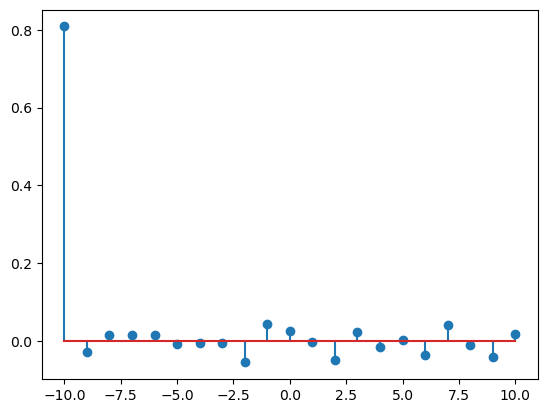

In [65]:
#Creating a Cross Correlation to Identify lagged effects between BTC and Etherium Return
from statsmodels.tsa.stattools import ccf
cross_corr = ccf(cry['BTC_Close Volatility %'], cry['ETH_Close Volatility %'])
plt.stem(range(-10, 11), cross_corr[:21])

**At lag zero there is a strong relationship between the two time series suggesting that changes in one's  volatility will reflect immediately in other volatility. As the lag increases, the correlation decreases meaning no lagged realationship.**

## D. Linear Regression

In [69]:
#Using Linear Regression Model from Statsmodel library to determine how BTC returns explain ETH returns
import statsmodels.api as sm
X = sm.add_constant(cry['BTC_Close Volatility %'])
model = sm.OLS(cry['ETH_Close Volatility %'], X).fit()
model.summary()

                              OLS Regression Results                              
Dep. Variable:     ETH_Close Volatility %   R-squared:                       0.653
Model:                                OLS   Adj. R-squared:                  0.653
Method:                     Least Squares   F-statistic:                     2835.
Date:                    Wed, 19 Feb 2025   Prob (F-statistic):               0.00
Time:                            11:21:49   Log-Likelihood:                -3490.5
No. Observations:                    1507   AIC:                             6985.
Df Residuals:                        1505   BIC:                             6996.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

**R-squared value is 0.653(65.3%). This means that 65.3% of the variation in Ethereum's closing volatility is explained by Bitcoin's closing volatility.**
**Coefficient: 1.0447. This suggests that for every 1% increase in BTC's volatility, ETH's volatility increases by ~1.04%.**
**Const. Coef: 0.0345. This means that there is no such need for a constant term in model.**
**Data is positively skewed and leptokurtic in nature.**

# Volume Analysis

## A. Volume Trends:

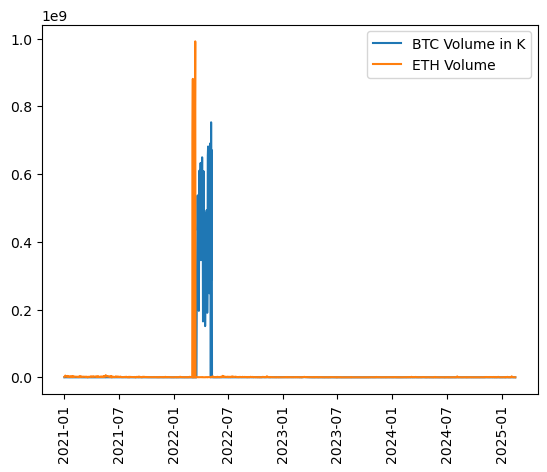

In [77]:
#Analysis Volume Trend between BTC and Etherium
plt.plot(cry['BTC_Vol. in K'], label='BTC Volume in K')
plt.plot(cry['ETH_Vol. in K'], label='ETH Volume')
plt.xticks(rotation = 'vertical')
plt.legend();

**The plot shows BTC and ETH trading volumes from 2021 to 2025. There is a massive spike in early 2022, indicating a major market event or anomaly. Apart from that, trading volumes remain low and stable. BTC volume appears more volatile. Further analysis is needed to identify the cause of the spike.**

## B. Volume vs Returns:

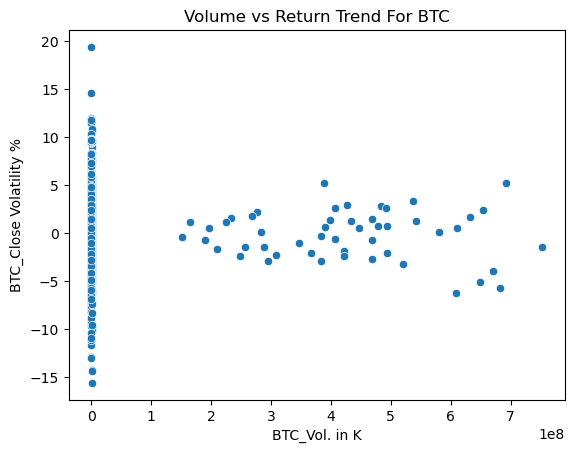

In [89]:
#plotting a graph to visualise the Volume traded and Return for BTC for Volume Analysis
sns.scatterplot(x='BTC_Vol. in K', y='BTC_Close Volatility %', data = cry)
plt.title('Volume vs Return Trend For BTC');

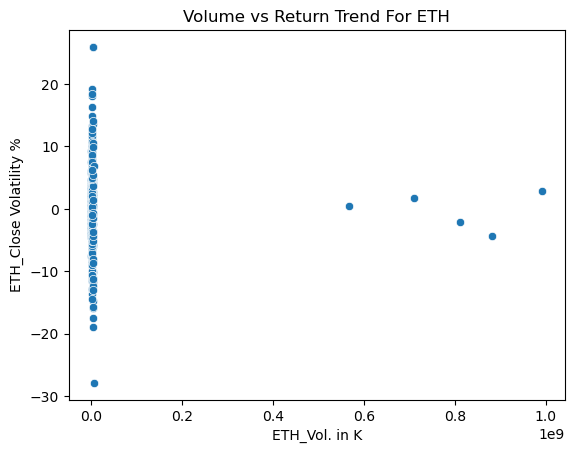

In [91]:
#plotting a graph to visualise the Volume traded and Return for Etherium for Volume Analysis
sns.scatterplot(x='ETH_Vol. in K', y='ETH_Close Volatility %', data = cry)
plt.title('Volume vs Return Trend For ETH');

# Volume vs Returns

In [97]:
#fitting OLS model to test if BTC’s volatility drives ETH’s volatility
X_vol = sm.add_constant(cry['BTC_Itraday Volatility in %'])
model_vol = sm.OLS(cry['ETH_Itraday Volatility in %'], X_vol).fit()
model_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     ETH_Itraday Volatility in %   R-squared:                       0.715
Model:                                     OLS   Adj. R-squared:                  0.714
Method:                          Least Squares   F-statistic:                     3767.
Date:                         Wed, 19 Feb 2025   Prob (F-statistic):               0.00
Time:                                 11:39:32   Log-Likelihood:                -3294.5
No. Observations:                         1507   AIC:                             6593.
Df Residuals:                             1505   BIC:                             6604.
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.7714      0.098      7.874      0.000       0.579       0.964
BTC_Itraday Volatility in %     1.0894      0.018     61.372      0.000       1.055       1.124
==============================================================================
Omnibus:                      497.974   Durbin-Watson:                   1.576
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7194.400
Skew:                           1.132   Prob(JB):                         0.00
Kurtosis:                      13.462   Cond. No.                         9.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**R-squared value is 0.715(71.5%). This means that 71.5% of the variation in Ethereum's Itraday Volatility/Price Range is explained by Bitcoin's Itraday Volatility/Price Range.**
**Coefficient: 1.0894. This suggests that for every 1% increase in BTC's Itraday Volatility/Price Range, ETH's Itraday Volatility/Price Range increases by ~1.0894%.**
**Const. Coef: 0.7714.**
**Data is positively skewed and leptokurtic in nature.**